<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/comparativo_classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges'] / 1000
data['region'] = data['region'].map({region: i for i, region in enumerate(data['region'].unique())})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

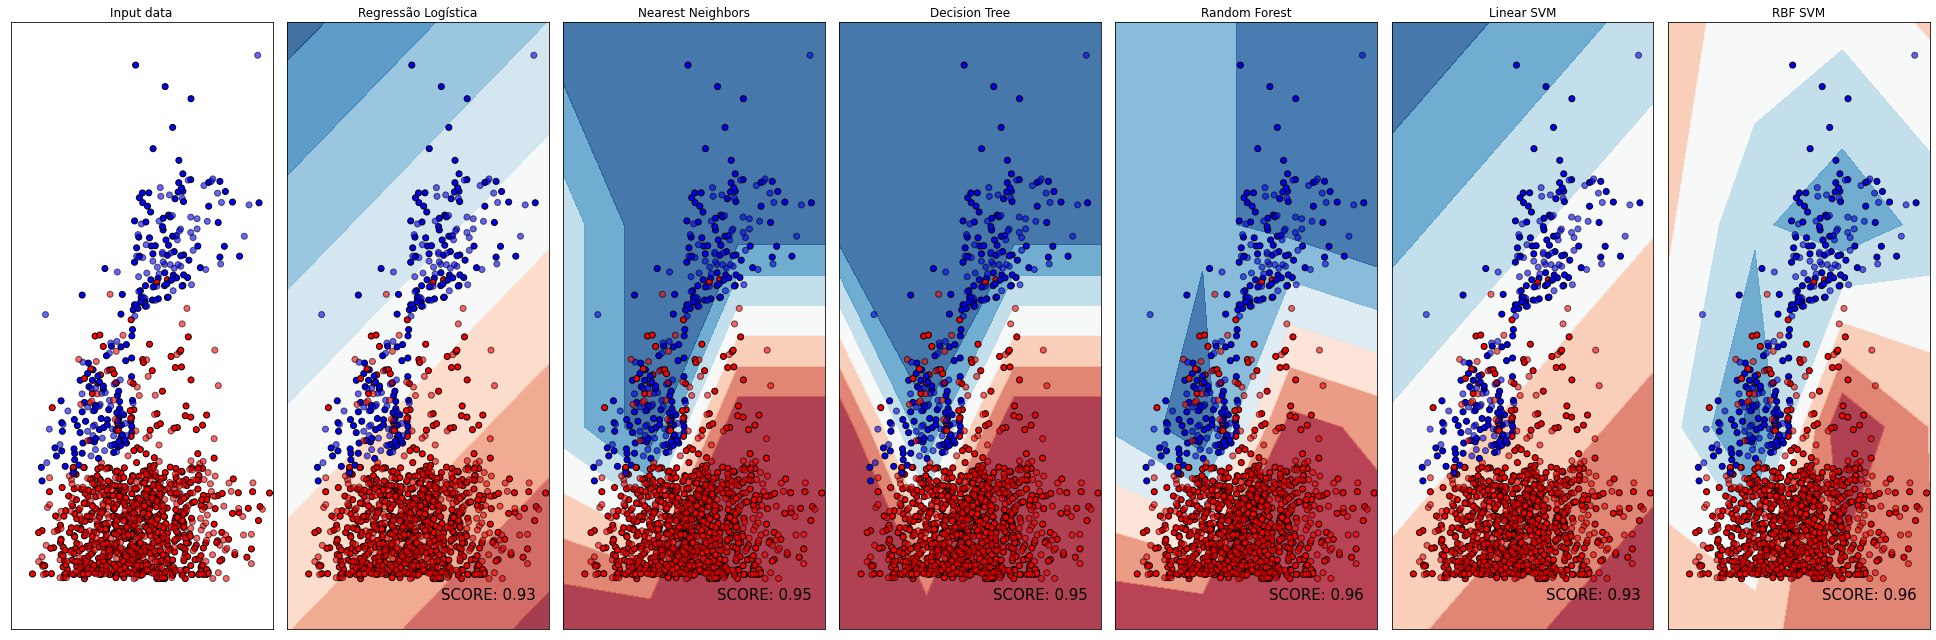

In [13]:
random_state = np.random.RandomState(0)
names = [
  'Regressão Logística',
  'Nearest Neighbors',
  'Decision Tree',
  'Random Forest',
  'Linear SVM',
  'RBF SVM',
  'Gaussian Process',
  'Neural Net',
  'AdaBoost',
  'Naive Bayes',
  'QDA',
]
classifiers = [
  LogisticRegression(),
  KNeighborsClassifier(3),
  DecisionTreeClassifier(max_depth=5),
  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
  svm.SVC(kernel="linear", probability=True, random_state=random_state),
  svm.SVC(gamma=2, C=1),
]
datasets = [
  (data[['bmi', 'charges']], data['smoker']),
]

figure = plt.figure(figsize=(27, 9))
i = 1
h = 2

for ds_cnt, ds in enumerate(datasets):

    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name)

        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ('SCORE: {:.2f}'.format(score)).lstrip('0'),
            size=15,
            horizontalalignment='right',
        )
        i += 1

plt.tight_layout()
plt.show()
